## Decision Tree

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris(as_frame=True)
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Data Visualization

In [7]:
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


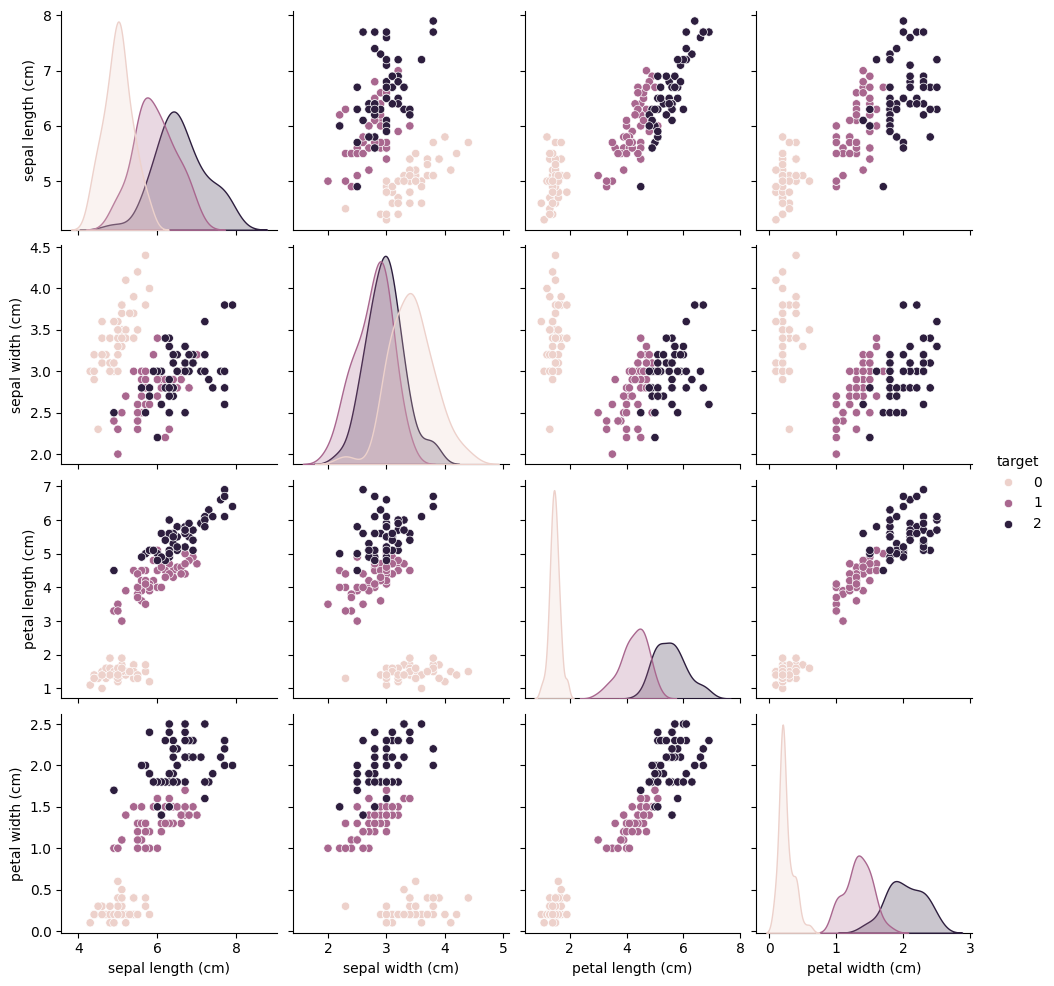

In [8]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 100
sns.pairplot(df, hue='target')

In [9]:
corr = df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

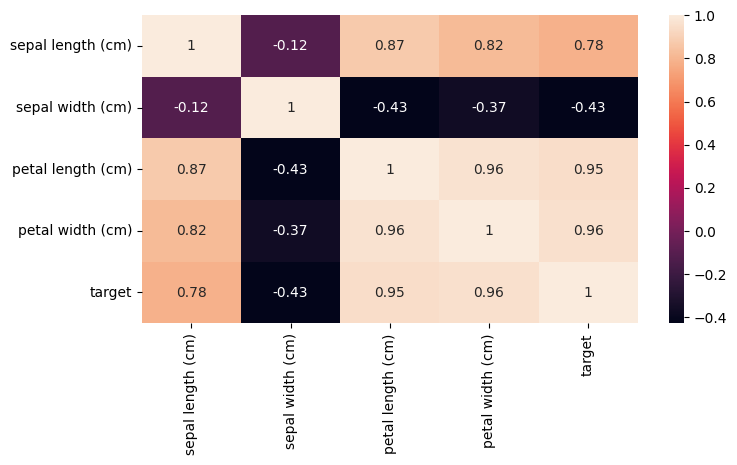

In [10]:
sns.heatmap(corr, annot=True)

## Train Test Split

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [14]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
pd.DataFrame(X_train).describe()

,0,1,2,3
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,6.513308e-16,3.108624e-16,2.960595e-17,-2.960595e-17
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.839628e+00,-2.373778e+00,-1.562535e+00,-1.446088e+00
25%,-8.644522e-01,-5.850598e-01,-1.276006e+00,-1.179118e+00
50%,-7.212234e-02,-1.378803e-01,2.998997e-01,1.557325e-01
75%,7.202076e-01,7.564785e-01,7.869979e-01,8.231577e-01
max,2.304867e+00,2.992376e+00,1.703889e+00,1.757553e+00


## Model Building and Evaluation

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [20]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



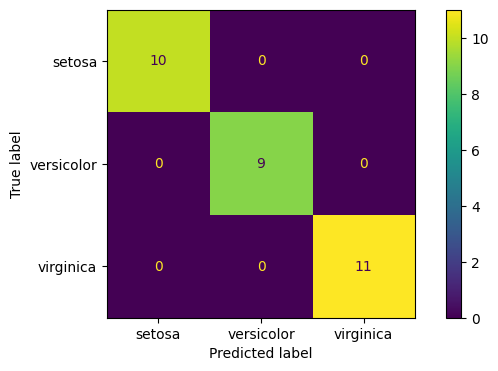

In [23]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()

## Tree Visualization

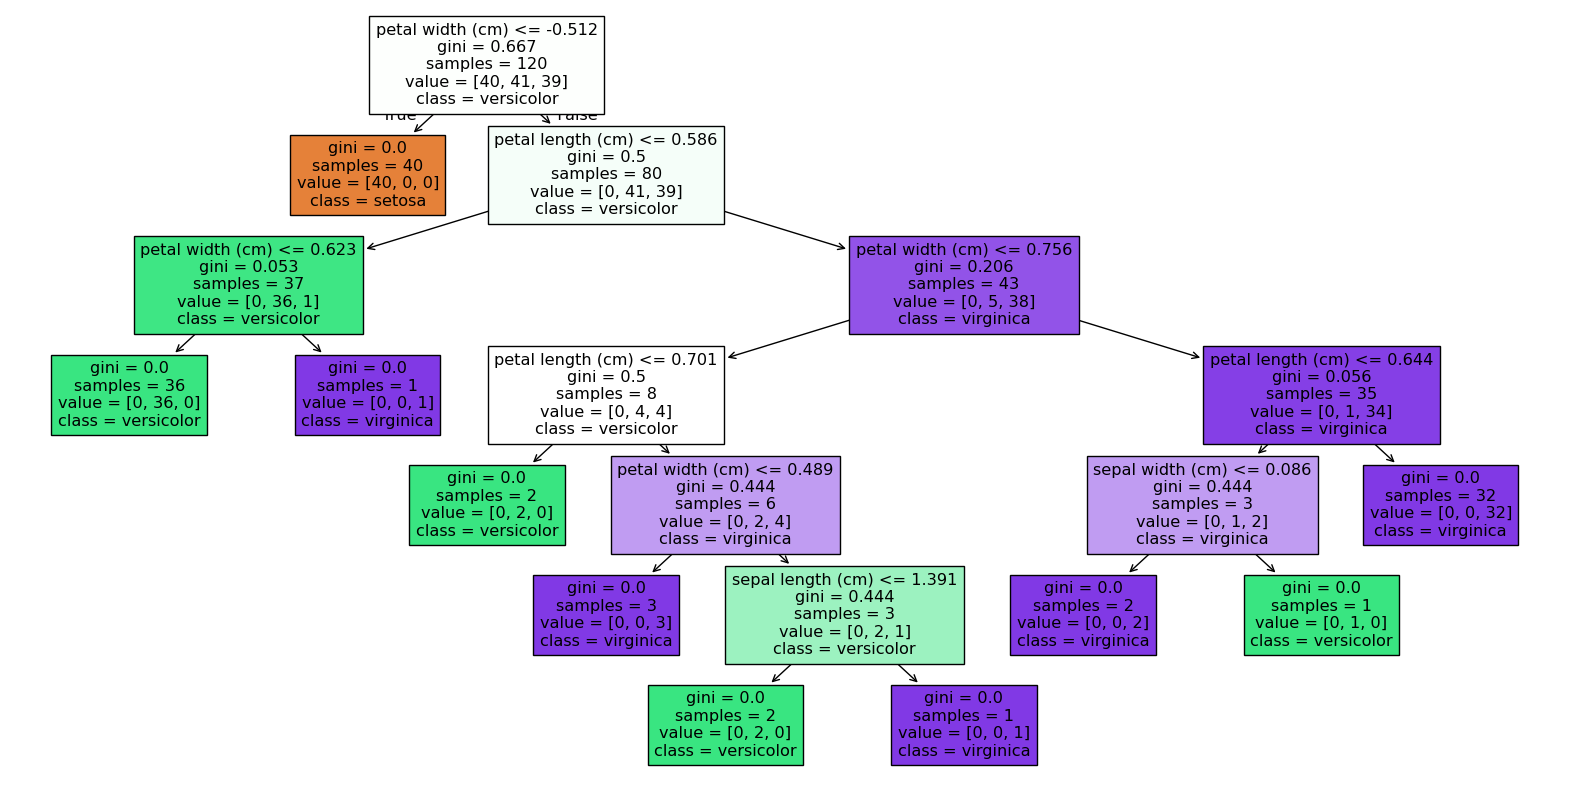

In [25]:
from sklearn import tree
plt.figure(figsize=(20, 10))
ax = tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

## Hyperparameter Optimization

In [29]:
from sklearn.model_selection import GridSearchCV


In [30]:
params = {'criteria': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3]}

In [32]:
dt = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],  # Correct parameter
    'max_depth': [None, 10, 20, 30],  # Example values
    'min_samples_split': [2, 5, 10],  # Example values
}

# Set up GridSearchCV
grid = GridSearchCV(dt, param_grid=params, cv=5)

# Fit the model
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

In [33]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=30)

In [34]:
grid.best_score_

0.9583333333333334

In [35]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Decision Tree Regression

In [36]:
from sklearn import datasets
diabetes = datasets.load_diabetes(as_frame=True)


In [38]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [39]:
df = diabetes.frame
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


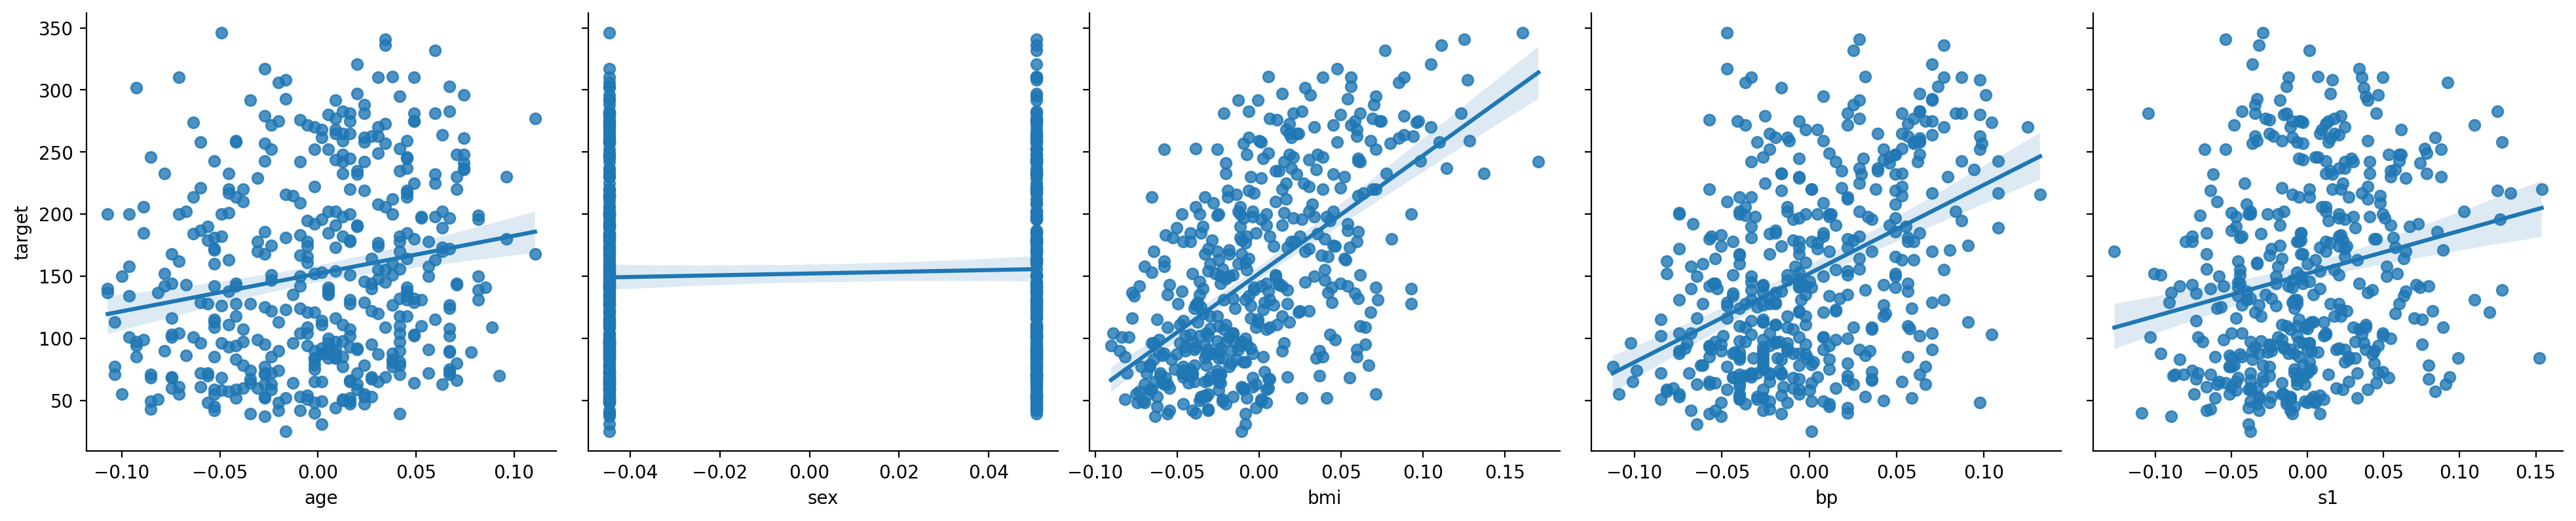

In [41]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 200
sns.pairplot(df, x_vars= df.columns[:5], y_vars='target', height=4, kind='reg')

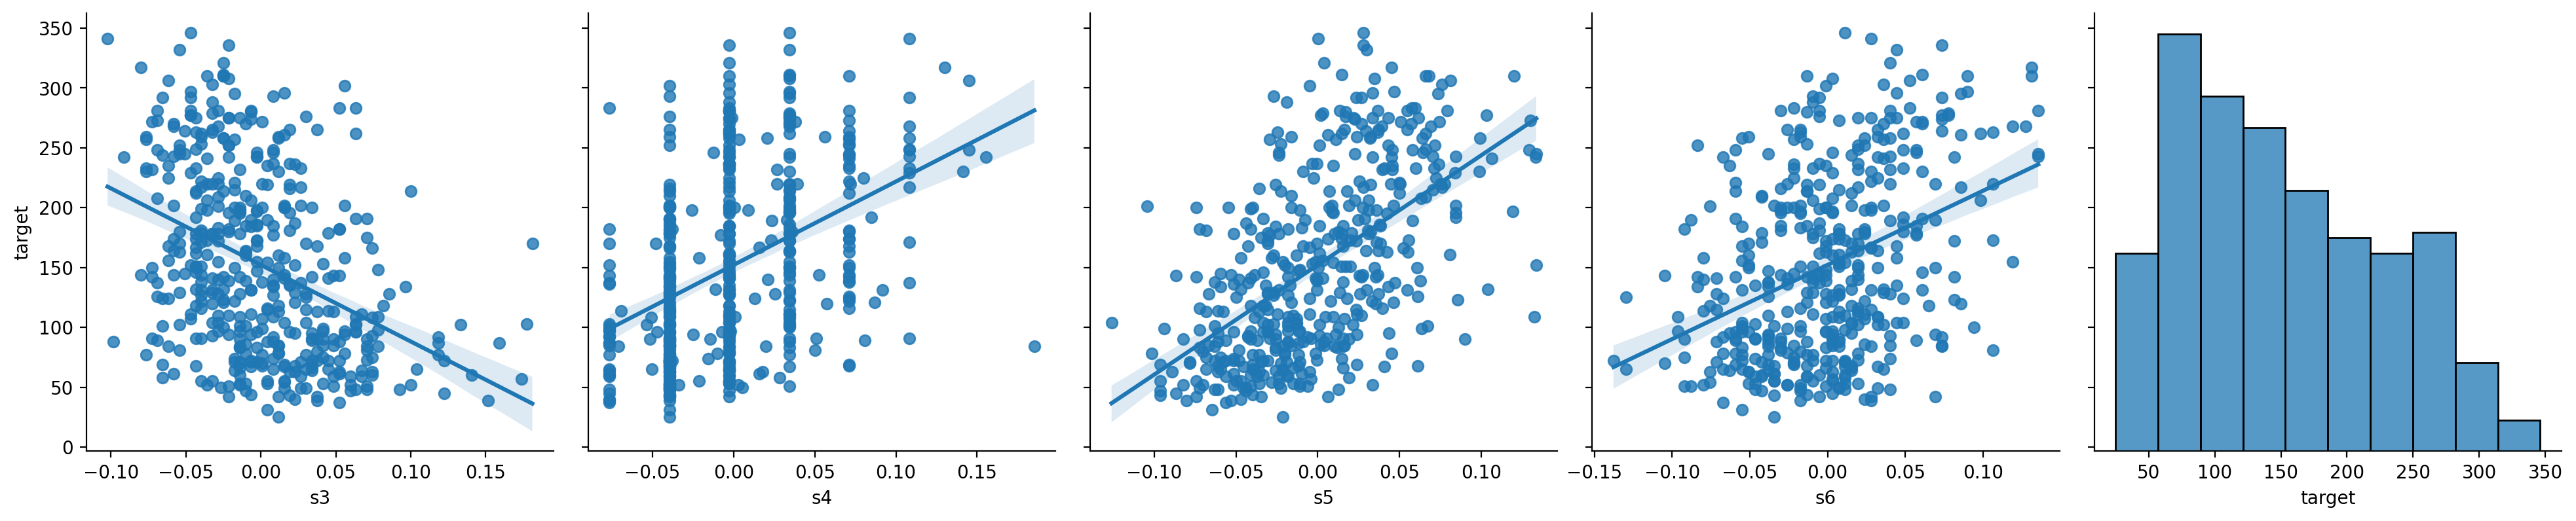

In [42]:
sns.pairplot(df, x_vars= df.columns[-5:], y_vars='target', height=4, kind='reg')

## Model Building

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [44]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [50]:
X_train, X_test, y_train, y_test  = train_test_split(df[diabetes.feature_names], df['target'], test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((353, 10), (89, 10))

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9
count,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02
mean,-2.516086e-17,-6.038607e-17,1.006434e-17,1.509652e-17,1.509652e-17,1.509652e-17,2.516086e-17,-3.774129e-17,5.032172e-18,-2.516086e-18
std,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00
min,-2.231571e+00,-9.748211e-01,-1.832471e+00,-2.375019e+00,-2.300645e+00,-2.436674e+00,-2.163283e+00,-1.598664e+00,-2.574942e+00,-2.788322e+00
25%,-8.062641e-01,-9.748211e-01,-7.300779e-01,-7.650898e-01,-7.235278e-01,-6.210169e-01,-6.810191e-01,-8.307241e-01,-6.793412e-01,-6.896489e-01
50%,9.392955e-02,-9.748211e-01,-1.568334e-01,-1.064822e-01,-8.099871e-02,-6.900397e-02,-1.349220e-01,-6.278400e-02,-1.055991e-01,-1.807356e-02
75%,7.690748e-01,1.025829e+00,6.368898e-01,6.984827e-01,5.615304e-01,5.495165e-01,5.672028e-01,7.051561e-01,6.361900e-01,5.695548e-01
max,2.269397e+00,1.025829e+00,3.503112e+00,2.820663e+00,3.277676e+00,4.240687e+00,3.843785e+00,3.846031e+00,2.726822e+00,2.752175e+00


In [52]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([261., 306., 202., 202.,  52., 281.,  88., 178., 141., 202., 152.,
        84., 178.,  72., 233.,  43., 252., 118., 116., 311., 202., 129.,
       197., 187., 163., 248., 170.,  42.,  67.,  90., 189.,  42., 190.,
       160., 109., 172., 183.,  77.,  72., 150., 177., 160., 115., 202.,
       341., 158., 148.,  96., 124., 150., 252.,  42.,  52., 206., 220.,
       292., 248., 168., 253., 143., 202., 129.,  69.,  97., 281., 184.,
       162., 166., 221., 170., 118., 241., 185., 129.,  90., 181.,  89.,
       233., 242., 139., 153., 111., 108., 178., 162.,  72., 246., 178.,
       113.])

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))

RMSE:  86.19477551361624
R2 Score:  -0.4488387379977157
